# Title: Heart Disease Prediction

`Author:` [Sufwan Mubeen](https://www.kaggle.com/sufwanmubeen)\
`Date:` August 03, 2024\
`DataSet:` [Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

## Meta-Data (About Dataset)
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp` chest pain type 
   1. typical angina
   2. atypical angina
   3. non-anginal
   4. asymptomatic
6. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9.  `restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
1.  `thalch:` maximum heart rate achieved
2.  `exang:` exercise-induced angina (True/ False)
3.  `oldpeak:` ST depression induced by exercise relative to rest
4.  `slope:` the slope of the peak exercise ST segment
5.  `ca:` number of major vessels (0-3) colored by fluoroscopy
6.  `thal:` [normal; fixed defect; reversible defect]
7.  `num:` the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.[Web Link](http://rexa.info/paper/b884ce2f4aff7ed95ce7bfa7adabaef46b88c60c)
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." [Web Link](http://rexa.info/paper/0519d1408b992b21964af4bfe97675987c0caefc)
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. [Web Link](http://rexa.info/paper/faecfadbd4a49f6705e0d3904d6770171b05041f)
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives:
To be filled after performing Exploratory Data Analysis (EDA).

### Import libraries
Let's begin by importing all the required libraries.

In [1]:
# import libraries

# to handle data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# to preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for machine learning task
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading DataSet

In [2]:
# load the locally present datafile
df = pd.read_csv('heart_disease_uci.csv')

# display the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---
## <span style="color:red">**Exploratory Data Analysis (EDA)**</span>

### Exploring each column

In [3]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# data shape
df.shape

(920, 16)

#### Let's explore `age` column:

In [5]:
# summarize age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [6]:
# age column min max
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

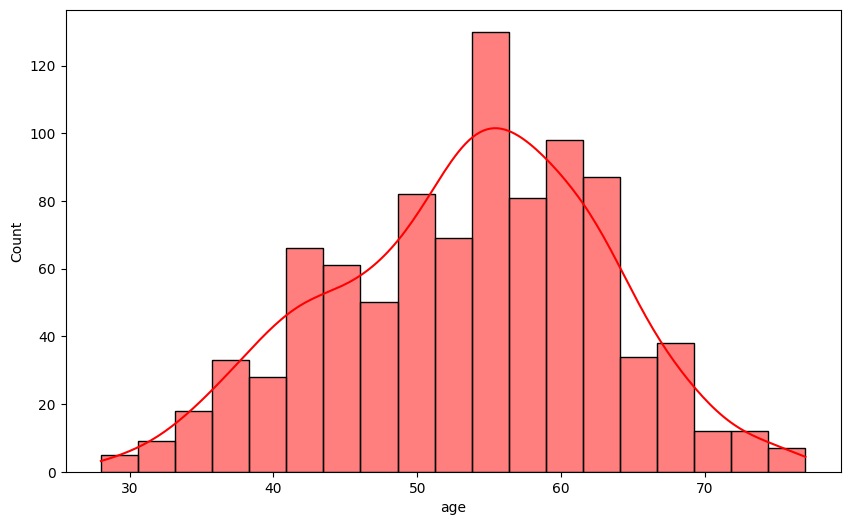

In [7]:
# draw a histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='red')

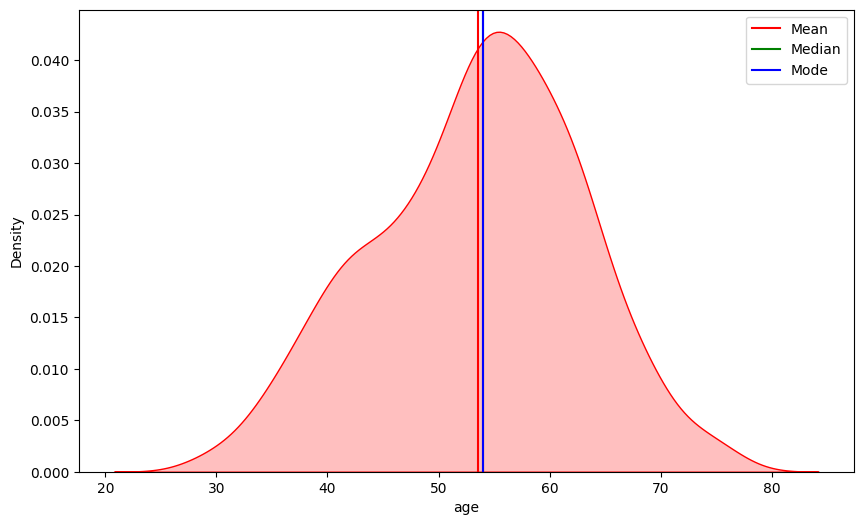

In [8]:
# plot mean median and mode of age column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], color='red', shade=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='green', label='Median')
plt.axvline(df['age'].mode()[0], color='blue', label='Mode')
plt.legend()
plt.show()

In [9]:
# print mean, median and mode values in f string
print(f"Mean: {df['age'].mean()}")
print(f"Median: {df['age'].median()}")
print(f"Mode: {df['age'].mode()[0]}")

Mean: 53.51086956521739
Median: 54.0
Mode: 54


Let's explore the gender based distribution of age column

In [10]:
# plot histogram of age column using plotly and color on sex basis
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [11]:
# value counts of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# calculate percentages of male and female value counts
male_count = 726
female_count = 194
total_count = male_count + female_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100
# print percentages with f string
print(f"Male percentage having heart disease in data: {male_percentage:.2f}%")
print(f"Female percentage having heart disease in data: {female_percentage:.2f}%")

# how much times male are of females
times = (male_count - female_count) / female_count
print(f'Males are {times:.2f} times more than females.')

Male percentage having heart disease in data: 78.91%
Female percentage having heart disease in data: 21.09%
Males are 2.74 times more than females.


In [13]:
# find the value of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

#### <span style="color:red">**Observations from `age` column:**</span>
1. The minimum age reported with heart disease is `28 years`.
2. The maximum age reported with heart disease is `77 years`.
3. From histogram, most cases are reported in 50-60 years age range.
4. More precisely, most people get heart disease at age of 53-54 years.
5. On gender basis, most of the male and female both get heart disease at age of 54-55 years.
6. Male percentage having heart disease in data: 78.91%.
7. Female percentage having heart disease in data: 21.09%.
8. Males are 2.74 times more than females.

#### Exploring `dataset` column:

In [14]:
# Let's deal with dataset column

# have a look at unique values
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
# dataset column value counts
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [16]:
# count plot of dataset column with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [17]:
# value count of dataset column with groupby sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [18]:
# plot in plotly age column and color on base of dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.show()

In [19]:
# print mean, median and mode of age grouped by dataset column
print("Mean:\n", df.groupby('dataset')['age'].mean())
print('============================')
print("Median:\n", df.groupby('dataset')['age'].median())
print('============================')
print("Mode:\n", df.groupby('dataset')['age'].agg(lambda x: x.mode().values[0]))
print('============================')

Mean:
 dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median:
 dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode:
 dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


#### <span style="color:red">**Observations from `dataset` column:**</span>
1. DataSet is from 4 different places.
2. We have highest number of people from `Cleveland` (304) and lowest from `Switzerland` (123).
3. The highest number of females in this data are from `Cleveland` (97) and lowest from `VA Long Beach` (6).
4. The highest number of males in this data are from `Hungary` (202) and lowest from `Switzerland` (113).
5. Mean, median and mode of `dataset` column grouped by age are as:
   - Mean:
     - Cleveland = 54.351974
     - Hungary = 47.894198
     - Switzerland = 55.317073
     - VA Long Beach = 59.350000
   - Median:
     - Cleveland = 55.5
     - Hungary = 49.0
     - Switzerland = 56.0
     - VA Long Beach = 60.0
   - Mode:
     - Cleveland        58
     - Hungary          54
     - Switzerland      61
     - VA Long Beach    62

#### Exploring `cp` (Chest Pain) column

In [20]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [21]:
# plot of cp column grouped by age column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

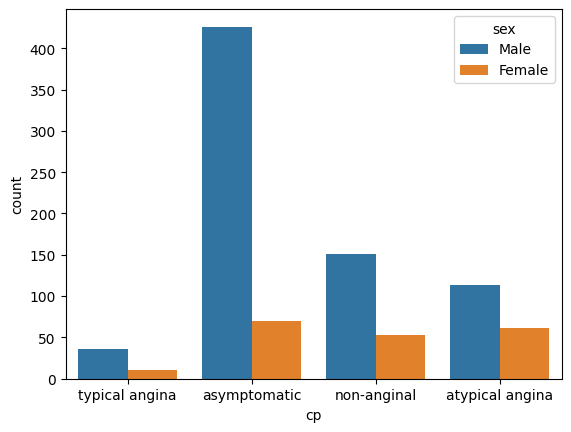

In [22]:
# count plot of cp column grouped by sex
sns.countplot(df, x='cp', hue='sex')

In [23]:
# value count of cp grouped by sex
df.groupby('sex')['cp'].value_counts()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

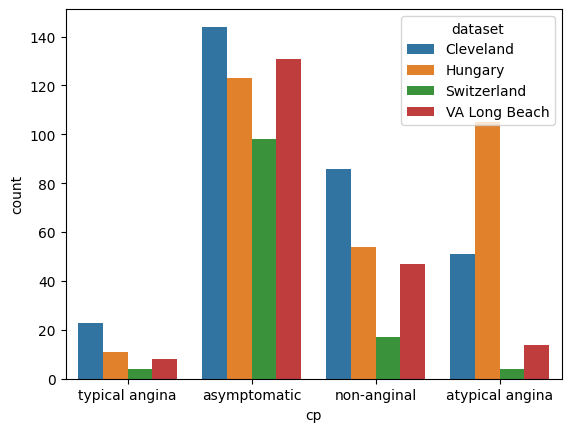

In [24]:
# count plot of cp column grouped by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [25]:
# value count of cp grouped by dataset column
df.groupby('dataset')['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

#### <span style="color:red">**Observations from `cp` column:**</span>
1. Highest number of people have chest pain type `asymptomatic` (946).
2. Lowest number of people have chest pain type `typical angina` (46).
3. Chest pain type `asymptomatic` is highest in both males (426) and females (70).
4. Same trend is being followed in `dataset` column.
5. `asymtomatic` type pain being most common is having following distribution in `dataset` column:
   - Cleveland = 144
   - VA Long Beach = 131
   - Hungary = 123
   - Switzerland = 98
1. Highest number of people have chest pain type `asymptomatic` (946).
2. Lowest number of people have chest pain type `typical angina` (46).
3. Chest pain type `asymptomatic` is highest in both males (426) and females (70).
4. Same trend is being followed in `dataset` column.
5. `asymtomatic` type pain being most common is having following distribution in `dataset` column:
   - Cleveland = 144
   - VA Long Beach = 131
   - Hungary = 123
   - Switzerland = 98

#### Let's explore `trestbps` (resting blood pressure) column:
The normal resting blood pressure is 120/80 mm Hg.

In [26]:
# description of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

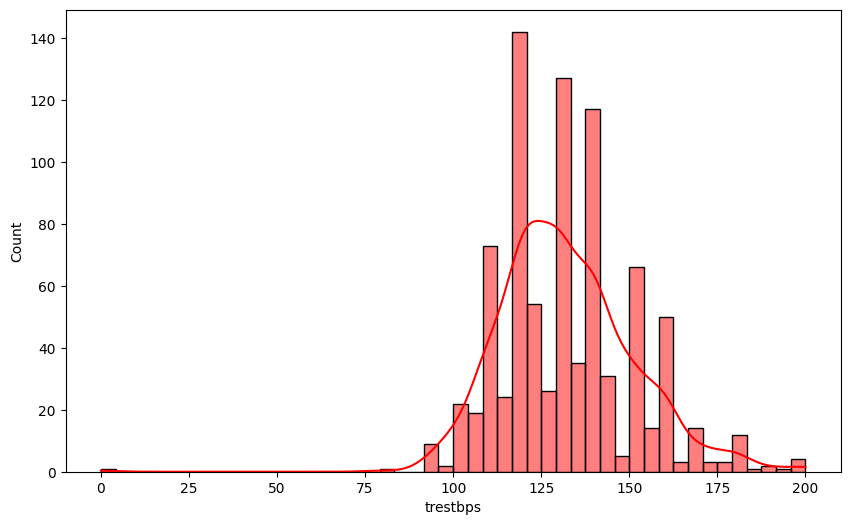

In [27]:
# histplot of trestbps column
plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], kde=True, color='red')

In [28]:
# plot of trestbps grouped by dataset
fig = px.histogram(df, x='trestbps', color='dataset')
fig.show()

In [29]:
# plot of trestbps grouped by sex
fig = px.histogram(df, x='trestbps', color='sex')
fig.show()

In [30]:
# checking for missing values in trestbps
df['trestbps'].isnull().sum()

59

#### <span style="color:red">**Observations from `trestpbs` column:**</span>
1. The minimum value of resting blood pressure is noted `0 mm Hg` which is not possible so it is considered outlier.
2. The maximum value of resting blood pressure is noted `200 mm Hg`.
3. There are 59 missing values noted in this column which will be imputed in later section.
4. Most values of trestbps are concentrated in the interval 120-140 mm Hg.
5. There is no signigicant difference in the distribution of trestbps values if grouped by `sex` or `dataset`.

#### Let's explore `chol` (serum cholesterol in mg/dl) column:
A normal total cholesterol level for adults is less than 200 milligrams per deciliter (mg/dL). Levels between 200 and 239 mg/dL are considered borderline high, and levels of 240 mg/dL or higher are considered high.

<Axes: xlabel='chol', ylabel='Count'>

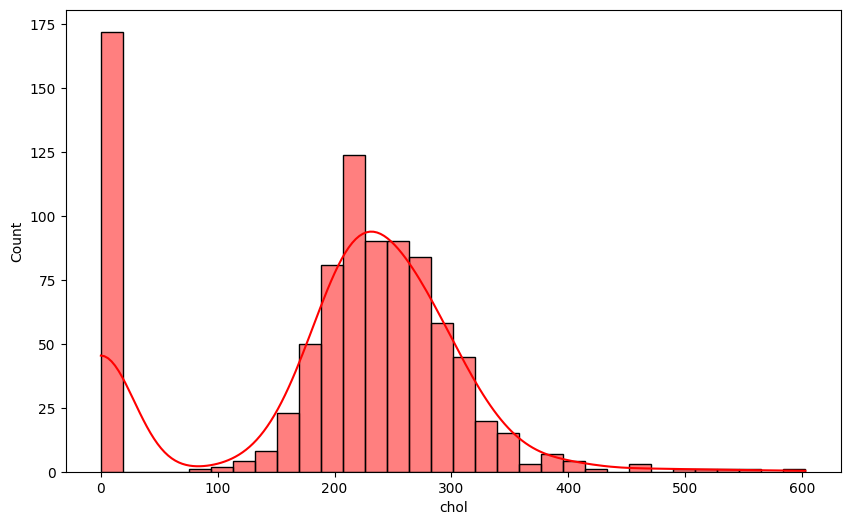

In [31]:
# histplot of chol column
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, color='red')

In [32]:
# to check how many '0' values are present
df['chol'].value_counts()

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [33]:
# groupby sex column
df.groupby('chol')['sex'].value_counts()

chol   sex   
0.0    Male      161
       Female     11
85.0   Male        1
100.0  Male        2
117.0  Male        1
                ... 
491.0  Male        1
518.0  Male        1
529.0  Male        1
564.0  Female      1
603.0  Male        1
Name: count, Length: 319, dtype: int64

In [34]:
# groupby sex column
df.groupby('chol')['sex'].value_counts()

chol   sex   
0.0    Male      161
       Female     11
85.0   Male        1
100.0  Male        2
117.0  Male        1
                ... 
491.0  Male        1
518.0  Male        1
529.0  Male        1
564.0  Female      1
603.0  Male        1
Name: count, Length: 319, dtype: int64

In [35]:
# plot of chol groupby dataset using ploly
fig = px.histogram(df, x='chol', color='dataset')
fig.show()

In [36]:
# plot of chol groupby sex using ploly
fig = px.histogram(df, x='chol', color='sex')
fig.show()

In [37]:
# missing values in chol
df['chol'].isnull().sum()

30

#### <span style="color:red">**Observations from `chol` column:**</span>
1. The data is having 172 entries of 0 mg/dL cholestrol level values which is far from normal range so, it will be dealt later.
2. The 172 entries of 0 mg/dL cholestrol level values comprises of 161 males and 11 females.
3. **`An important thing noticed`** that there are total 123 entries from Switzerland and all have cholestrol level value 0 mg/dL which is an error on behalf of data collection.
4. The rest of 49 entries are from VA Long Beach.
5. `chol` also contain 30 missing values.

#### Let's explore `fbs` (if fasting blood sugar > 120 mg/dl) column:
A fasting blood sugar level of 70–100 mg/dL is considered normal, according to the World Health Organization (WHO). Here > 120 md/dL is considered diabetic and stated `True` and lower non-diabetic stated `False`.

In [38]:
# value counts of fbs
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [39]:
# missing values in fbs
df['fbs'].isnull().sum()

90

In [40]:
# histplot of fbs with color sex using plotly
fig = px.histogram(df, x='fbs', color='sex')
fig.show()

In [41]:
# histplot of fbs with color dataset using plotly
fig = px.histogram(df, x='fbs', color='dataset')
fig.show()

#### <span style="color:red">**Observations from `fbs` column:**</span>
1. `fbs` contains 90 missing values.
2. Out of all patients reported 692 are non-diabetic and 138 are diabetic.
3. The distribution of data is pretty much same if grouped by `sex` or `dataset` as most of people are non-diabetic and some are diabetic. So there is no specific or notable pattern here.

#### Let's explore `restecg` (resting electrocardiographic results) column:
**Values:** [normal, stt abnormality, lv hypertrophy]

In [42]:
# value counts of restecg
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

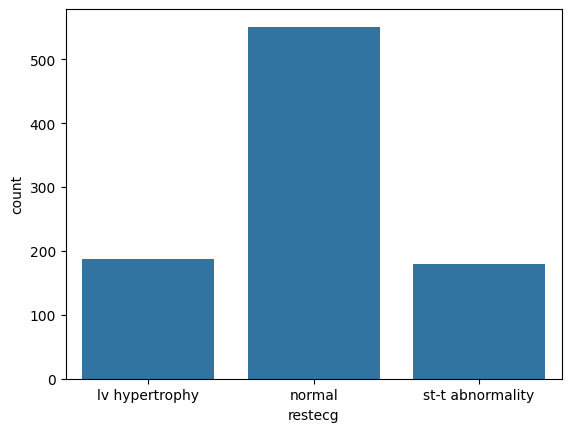

In [43]:
# countplot of restecg
sns.countplot(df, x='restecg')

In [44]:
# missing values in restecg
df['restecg'].isnull().sum()

2

In [45]:
# plot of dataset grouped by restecg using plotly
fig = px.histogram(df, x='dataset', color='restecg')
fig.show()

#### <span style="color:red">**Observations from `restecg` column:**</span>
1. There are 551 people with normal value of restecg.
2. There are 188 people with lv hypertrophy value of restecg.
3. There are 179 people with st-t abnormality value of restecg.
4. There are 2 missing values.
5. Most of the people with:
   - Normal value are from Hungary.
   - st-t abnormality are from VA Long Beach.
   - lv hypertrophy are from Cleveland.

#### Let's explore `thalch` (maximum heart rate achieved) column:
A normal resting heart rate for an adult is between 60 and 100 beats per minute (bpm).

In [46]:
# summary of thalch
df['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [47]:
# missing values in thalch
print(f"There are {df['thalch'].isnull().sum()} missing values.")

There are 55 missing values.


<Axes: xlabel='thalch', ylabel='Count'>

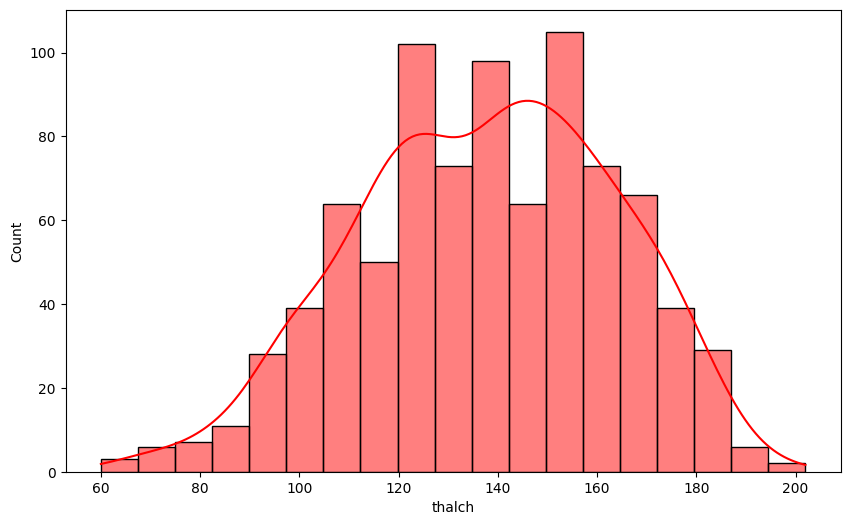

In [48]:
# plotting thalch
plt.figure(figsize=(10, 6))
sns.histplot(df['thalch'], kde=True, color='red')

In [49]:
# plotting thalch with color sex using plotly
fig = px.histogram(df, x='thalch', color='sex')
fig.show()

#### <span style="color:red">**Observations from `thalch` column:**</span>
1. The maximum value reported in `thalch` is 202.
2. The minimum value reported is 60.
3. There are 55 missing values.
4. The mean of max. heart rate achieved is 137.545665.

#### Let's explore `exang` (exercise-induced angina) column:
Exercise-induced angina is chest pain that occurs when the heart works harder during exercise or other physical activity.\
This is a boolean variable.

In [50]:
# summary of exang
df['exang'].describe()

count       865
unique        2
top       False
freq        528
Name: exang, dtype: object

In [51]:
# value counts of exang
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [52]:
# missing values in exang
df['exang'].isnull().sum()

55

In [53]:
# plot of exang with color sex using plotly
fig = px.histogram(df, x='dataset', color= 'exang')
fig.show()

#### <span style="color:red">**Observations from `thalch` column:**</span>
1. There are 337 people that have problem with exercise induced angina.
2. Whereas other 528 donot have any such issues.
3. There are 55 missing values.
4. Out of those who doesnot have any issue are mostly from Cleveland and Hungary. Whereas those with problem are least from Switzerland.

#### Let's explore `oldpeak` (ST depression induced by exercise relative to rest) column:
ST depression refers to a finding on an electrocardiogram(ECG), wherein the trace in the ST segment is abnormally low below the baseline.\
ST segment depression (ST depression) is considered normal if it's less than 0.5 millimeters (mm) in all leads.

In [54]:
# oldpeak summary
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [55]:
# missing values in oldpeak
print(f"There are {df['oldpeak'].isnull().sum()} missing values.")

There are 62 missing values.


In [56]:
# plot of oldpeak with color sex using plotly
fig = px.histogram(df, x='oldpeak', color='dataset')
fig.show()

#### <span style="color:red">**Observations from `oldpeak` column:**</span>
1. The minimum ST depression value is -2.6 mm and maximum value is 6.2 mm.
2. The average value reported is 0.878788 mm.
3. There are 62 missing values.
4. Most repeated value of ST depression is 0.

#### Let's explore `slope` (the slope of the peak exercise ST segment) column:
**Values**: [flat, upsloping, downsloping]

In [57]:
# value counts of slope
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [58]:
# missing values in slope
print(f"There are {df['slope'].isnull().sum()} missing values.")

There are 309 missing values.


In [59]:
# plot of slope with color sex using plotly
fig = px.histogram(df, x='slope', color='sex')
fig.show()

In [60]:
# plot of slope with color dataset using plotly
fig = px.histogram(df, x='slope', color='dataset')
fig.show()

#### <span style="color:red">**Observations from `slope` column:**</span>
1. The distribution of people in the `slope` column is as:
   - flat = 345
   - upsloping = 203
   - downsloping = 63
2. There are 309 missing values.
3. The upsloping is considerabely more in females as compared to males.
4. Whereas downsloping is more in males as compared to females.
5. Similarly there is trend in `dataset` column regarding slope:
   - Upsloping is dominant in Cleveland.
   - Downsloping is dominant in VA Long Beach.

#### Let's explore `ca` (number of major vessels (0-3) colored by fluoroscopy) column:

In [61]:
# value counts of ca
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [62]:
# missing values in ca
print(f"There are {df['ca'].isnull().sum()} missing values.")

There are 611 missing values.


In [63]:
# value count of ca grouped by dataset
df.groupby('ca')['dataset'].value_counts()

ca   dataset      
0.0  Cleveland        176
     Hungary            3
     VA Long Beach      2
1.0  Cleveland         65
     Switzerland        2
2.0  Cleveland         38
     Switzerland        3
3.0  Cleveland         20
Name: count, dtype: int64

In [64]:
# plot of ca with color sex using plotly
fig = px.histogram(df, x='dataset', color='ca')
fig.show()

#### <span style="color:red">**Observations from `ca` column:**</span>
1. There are 611 missing values.
2. Most number of people (181) have 0 number of vessels controlled.
3. On `dataset` basis `ca` have following distribution:
   - 0.0
     - Cleveland = 176
     - Hungary = 3
     - VA Long Beach = 2
   - 1.0
     - Cleveland = 65
     - Switzerland = 2
   - 2.0
     - Cleveland = 38
     - Switzerland = 3
   - 3.0
     - Cleveland = 20

#### Let's explore `thal` (blood disorder called thalassemia) column:
**Values:** [normal, fixed defect, reversible defect]

In [65]:
# value counts of thal
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [66]:
# missing values in thal
print(f"There are {df['thal'].isnull().sum()} missing values.")

There are 486 missing values.


In [67]:
# plot of thal grouped by dataset using plotly
fig = px.histogram(df, x='dataset', color='thal')
fig.show()

In [68]:
# plot of thal grouped by sex using plotly
fig = px.histogram(df, x='thal', color='sex', barmode='group', title='Thalassemia by Sex')
fig.show()

#### <span style="color:red">**Observations from `thal` column:**</span>
1. There are 486 missing values.
2. The fixed defect has different distribution than other value counts as it has significant number in countries other than Cleveland too. Whereas other value count does not have any significant number in other countries.
3. On gender basis, females have far less reversible defect as compared to that of males.

#### Let's explore `num` (the predicted attribute) column:

In [69]:
# value count of num
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [70]:
# missing values in num
print(f"There are {df['num'].isnull().sum()} missing values.")

There are 0 missing values.


In [71]:
# value count of num grouped by dataset
df.groupby('num')['dataset'].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

In [72]:
# plot of num grouped by sex using plotly
fig = px.histogram(df, x='dataset', color='num')
fig.show()

#### <span style="color:red">**Observations from `num` column:**</span>
1. This is the prediction whether certain individual have heart disease or not.
2. **Values:** 0 = No heart disease, 1,2,3,4 = Different stages of heart disease

---

## <span style="color: red; font-weight: bold;">Dealing with missing values</span>

A fuction will be defined to get the job done!

In [73]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [74]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [75]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [76]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [77]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.080982658959538 

RMSE = 17.220188867265 

R2 = 0.07412231312696294 

Missing Values chol : 3.26%
MAE = 45.38370786516854 

RMSE = 63.75357095087901 

R2 = 0.6780209043094383 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.834219653179193 

RMSE = 21.796121254344868 

R2 = 0.30920729265890246 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 76.88 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5659011627906977 

RMSE = 0.7880115208401107 

R2 = 0.408406927584649 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 68.97 accuracy



In [78]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Missing Values Imputation Key Steps:
- We `separated columns` containing missing values in an object.
- Out of all the columns, `categorical, bool and numeric type` columns were separated.
- We then `defined two functions`, one for `numeric` data type imputation and other for `non-numeric` datatype imputation.
- These functions used the strategy of `Random Forest Classifier` and `Random Forest Regressor` for imputing non-numeric and numeric columns respectively.
- In the end, used a `for loop to impute all` the mmissing values by passing columns into functions.

---
## <span style="color: red; font-weight: bold;">Dealing with Outliers</span>

In [79]:
# boxplot for all numeric columns with different colors and using for loop and subplot
fig = go.Figure()

for i, col in enumerate(numeric_cols):
    fig.add_trace(go.Box(x=df[col], name=col))

fig.update_layout(title="Boxplot for Numeric Columns",
                  xaxis_title="Columns",
                  yaxis_title="Values")

fig.show()

In [80]:
# print the row where trestbps is 0
df[df['trestbps'] == 0]

# drop the row where trestbps is 0
df = df[df['trestbps'] != 0]

- `0` values in `chol` column will be treated specially later on.
- Here is just a glimpse of those values.

In [81]:
# print the row where chol is 0
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,124.36,0.0,False,normal,130.00,True,1.001,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.0,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,normal,1
839,840,56,Male,VA Long Beach,asymptomatic,141.97,0.0,False,lv hypertrophy,122.15,True,2.001,flat,0.0,reversable defect,1


In [82]:
# replacing the 0 in chol column with nan
df['chol'] = df['chol'].replace(0, np.nan)
# display rows where chol has missing value

df[df['chol'].isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,NaN,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,NaN,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,124.36,NaN,False,normal,130.00,True,1.001,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,NaN,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,NaN,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,NaN,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,NaN,True,st-t abnormality,160.00,False,3.000,flat,0.0,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,NaN,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,normal,1
839,840,56,Male,VA Long Beach,asymptomatic,141.97,NaN,False,lv hypertrophy,122.15,True,2.001,flat,0.0,reversable defect,1


In [83]:
df['chol'].isnull().sum()

171

In [84]:
# imputing these using function
df['chol'] = impute_continuous_missing_data('chol')

# check of they are imputed
df['chol'].isnull().sum()

MAE = 44.18945866666666 

RMSE = 55.35274150972711 

R2 = 0.018620755552535395 



0

---
## <span style="color: red; font-weight: bold;">Machine Learning</span>

The target column is `num` which is the predicted attribute. This column will be use to predict heart disease.
The unique values in this column are: [0, 1 ,2 ,3 ,4] which states there are 5 unique types of heart disease.
* `0 = No Heart Disease`
* `1 = Heart Disease Type 1`
* `2 = Heart Disease Type 2`
* `3 = Heart Disease Type 3`
* `4 = Heart Disease Type 4`

In [85]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode all the categorical column using separate encoder for each and save for inverse transform
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col])
    else:
        pass


# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Enlisting all the models to be used. These are models that work for multi-class classification.
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Decision Tree
4. Naive Bayes (NB)
5. Support Vector Machines (SVM)
6. Random Forest
7. XGBoost
8. AdaBoost
9. Gradient Boosting
10. lightGBM

In [86]:
# import all models stated
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import pipeline
from sklearn.pipeline import Pipeline

In [87]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline([('model', model)])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save best model using pickle
import pickle
with open('best_model_heart_disease.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Model: Logistic Regression
Cross-validation Accuracy: 0.5360544217687075
Test Accuracy: 0.4782608695652174

Model: KNN
Cross-validation Accuracy: 0.5795918367346938
Test Accuracy: 0.6086956521739131

Model: SVC
Cross-validation Accuracy: 0.5768707482993197
Test Accuracy: 0.5706521739130435

Model: Decision Tree
Cross-validation Accuracy: 0.6
Test Accuracy: 0.6086956521739131

Model: Random Forest
Cross-validation Accuracy: 0.6666666666666666
Test Accuracy: 0.657608695652174

Model: AdaBoost
Cross-validation Accuracy: 0.5891156462585034
Test Accuracy: 0.5597826086956522

Model: Gradient Boosting
Cross-validation Accuracy: 0.6653061224489797
Test Accuracy: 0.6793478260869565

Model: XGBoost
Cross-validation Accuracy: 0.6598639455782312
Test Accuracy: 0.6739130434782609

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

In [88]:
# load the saved model
with open('best_model_heart_disease.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# make predictions using loaded model
y_pred = loaded_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n', cm)

# classification report
cr = classification_report(y_test, y_pred)
print('Classification Report\n', cr)

Accuracy: 0.6793478260869565
Confusion Matrix
 [[67  6  1  1  0]
 [11 38  5  5  0]
 [ 3  9  8  2  1]
 [ 3  4  3 11  2]
 [ 0  0  1  2  1]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        75
           1       0.67      0.64      0.66        59
           2       0.44      0.35      0.39        23
           3       0.52      0.48      0.50        23
           4       0.25      0.25      0.25         4

    accuracy                           0.68       184
   macro avg       0.54      0.52      0.53       184
weighted avg       0.67      0.68      0.67       184



<Axes: >

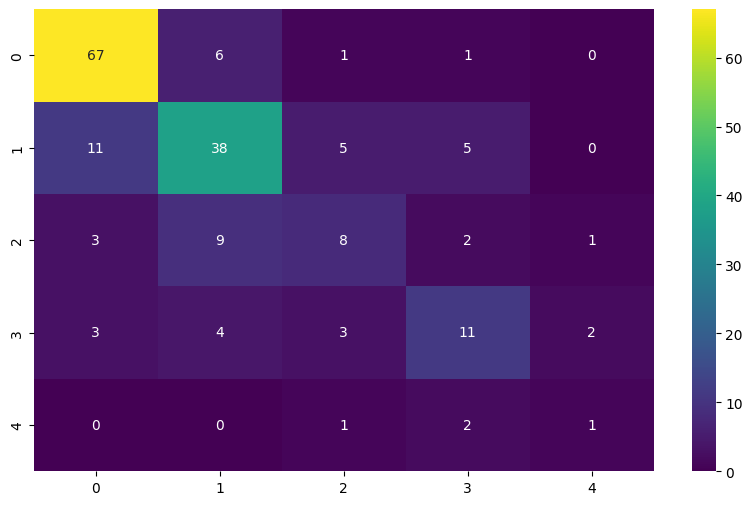

In [89]:
# heatplot of confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', cbar=True)

In [90]:
df.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
104,105,49,Male,Cleveland,non-anginal,120.00,188.0000,False,normal,139.00,False,2.000,flat,3.0,reversable defect,3
42,43,71,Female,Cleveland,atypical angina,160.00,302.0000,False,normal,162.00,False,0.400,upsloping,2.0,normal,0
602,603,38,Female,Switzerland,asymptomatic,110.00,288.7492,False,normal,156.00,False,0.000,flat,0.0,normal,1
351,352,41,Male,Hungary,atypical angina,120.00,291.0000,False,st-t abnormality,160.00,False,0.000,upsloping,0.0,normal,0
856,857,71,Male,VA Long Beach,non-anginal,138.24,221.0000,False,normal,121.62,False,2.736,downsloping,0.0,reversable defect,3


In [91]:
# sample prediction
sample_data = {'id': 920,
               'age': 51,
               'sex': 1,
               'dataset': 3,
               'cp': 2,
               'trestbps': 130,
               'chol': 350,
               'fbs': 0,
               'restecg': 0,
               'thalch': 142,
               'exang': 1,
               'oldpeak': 3.5,
               'slope': 3,
               'ca': 2,
               'thal': 2}

# convert to dataframe
sample_df = pd.DataFrame([sample_data])

# make prediction
prediction = loaded_model.predict(sample_df)
prediction

array([4], dtype=int64)